In [6]:
# The code was removed by Watson Studio for sharing.

# Week 5 Assignment: Battle of the Neighbourhoods

## Part 1- Setting up the working environment

In [3]:
!conda install -c conda-forge folium --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    folium-0.9.0               |             py_0          59 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will be IN

In [4]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import seaborn as sns
import folium
from geopy.geocoders import Nominatim

## Part 2- Importing and cleaning the data

### I will first import the division  into wards of the city of London and store it as a DataFrame

In [23]:
boroughs_url = "https://en.wikipedia.org/wiki/List_of_areas_of_London"

In [24]:
b_website = requests.get(boroughs_url)

In [25]:
b_data = b_website.text

In [26]:
b_soup = BeautifulSoup(b_data, "html.parser")

In [27]:
b_website_table = b_soup.find_all("table", class_="wikitable")[0]
b_website_table

<table class="wikitable sortable" style="clear:both;">
<tbody><tr>
<th>Location</th>
<th>London borough</th>
<th>Post town</th>
<th>Postcode district</th>
<th>Dial code</th>
<th>OS grid ref
</th></tr>
<tr>
<td><a href="/wiki/Abbey_Wood" title="Abbey Wood">Abbey Wood</a></td>
<td>Bexley,  Greenwich <sup class="reference" id="cite_ref-mills1_1-0"><a href="#cite_note-mills1-1">[1]</a></sup></td>
<td>LONDON</td>
<td>SE2</td>
<td>020</td>
<td><span class="plainlinks nourlexpansion" style="white-space: nowrap"><a class="external text" href="https://tools.wmflabs.org/os/coor_g/?pagename=List_of_areas_of_London&amp;params=TQ465785_region%3AGB_scale%3A25000">TQ465785</a></span>
</td></tr>
<tr>
<td><a href="/wiki/Acton,_London" title="Acton, London">Acton</a></td>
<td>Ealing, Hammersmith and Fulham<sup class="reference" id="cite_ref-mills2_2-0"><a href="#cite_note-mills2-2">[2]</a></sup></td>
<td>LONDON</td>
<td>W3, W4</td>
<td>020</td>
<td><span class="plainlinks nourlexpansion" style="white-sp

In [28]:
b_table_rows = b_website_table.find_all("tr")
b_table_rows[:5]

[<tr>
 <th>Location</th>
 <th>London borough</th>
 <th>Post town</th>
 <th>Postcode district</th>
 <th>Dial code</th>
 <th>OS grid ref
 </th></tr>, <tr>
 <td><a href="/wiki/Abbey_Wood" title="Abbey Wood">Abbey Wood</a></td>
 <td>Bexley,  Greenwich <sup class="reference" id="cite_ref-mills1_1-0"><a href="#cite_note-mills1-1">[1]</a></sup></td>
 <td>LONDON</td>
 <td>SE2</td>
 <td>020</td>
 <td><span class="plainlinks nourlexpansion" style="white-space: nowrap"><a class="external text" href="https://tools.wmflabs.org/os/coor_g/?pagename=List_of_areas_of_London&amp;params=TQ465785_region%3AGB_scale%3A25000">TQ465785</a></span>
 </td></tr>, <tr>
 <td><a href="/wiki/Acton,_London" title="Acton, London">Acton</a></td>
 <td>Ealing, Hammersmith and Fulham<sup class="reference" id="cite_ref-mills2_2-0"><a href="#cite_note-mills2-2">[2]</a></sup></td>
 <td>LONDON</td>
 <td>W3, W4</td>
 <td>020</td>
 <td><span class="plainlinks nourlexpansion" style="white-space: nowrap"><a class="external text" h

#### The second column in the table contains numbers in brackets such as [2]. This function will remove them

In [29]:
def remove_nums(borough):
    new_word = ""
    for c in range(len(borough)):
        if borough[c].isalpha():
            new_word += borough[c]
        if borough[c] == " ":
            if c != len(borough)-1 and borough[c+1].isalpha():
                new_word += " "
    return new_word

In [30]:
b_result = []
for tr in b_table_rows:
    td = tr.find_all("td")
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        row[1] = remove_nums(row[1])
        b_result.append(row)
b_result

[['Abbey Wood', 'Bexley Greenwich', 'LONDON', 'SE2', '020', 'TQ465785'],
 ['Acton',
  'Ealing Hammersmith and Fulham',
  'LONDON',
  'W3, W4',
  '020',
  'TQ205805'],
 ['Addington', 'Croydon', 'CROYDON', 'CR0', '020', 'TQ375645'],
 ['Addiscombe', 'Croydon', 'CROYDON', 'CR0', '020', 'TQ345665'],
 ['Albany Park', 'Bexley', 'BEXLEY, SIDCUP', 'DA5, DA14', '020', 'TQ478728'],
 ['Aldborough Hatch', 'Redbridge', 'ILFORD', 'IG2', '020', 'TQ455895'],
 ['Aldgate', 'City', 'LONDON', 'EC3', '020', 'TQ334813'],
 ['Aldwych', 'Westminster', 'LONDON', 'WC2', '020', 'TQ307810'],
 ['Alperton', 'Brent', 'WEMBLEY', 'HA0', '020', 'TQ185835'],
 ['Anerley', 'Bromley', 'LONDON', 'SE20', '020', 'TQ345695'],
 ['Angel', 'Islington', 'LONDON', 'EC1, N1', '020', 'TQ345665'],
 ['Aperfield', 'Bromley', 'WESTERHAM', 'TN16', '01959', 'TQ425585'],
 ['Archway', 'Islington', 'LONDON', 'N19', '020', 'TQ285875'],
 ['Ardleigh Green', 'Havering', 'HORNCHURCH', 'RM11', '01708', 'TQ535895'],
 ['Arkley', 'Barnet', 'BARNET, LOND

#### I will now convert it to a DataFrame.

In [31]:
london_df = pd.DataFrame(b_result, columns=["Ward", "Borough", "Post town", "Postcode district", "Dial code", "OS grid ref"])

In [32]:
london_df.head()

,Ward,Borough,Post town,Postcode district,Dial code,OS grid ref
0,Abbey Wood,Bexley Greenwich,LONDON,SE2,020,TQ465785
1,Acton,Ealing Hammersmith and Fulham,LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon,CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon,CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


#### I will drop all the columns except the first one as they do not provide useful insight for my study.

In [33]:
london_df.drop(["Post town", "Postcode district", "Dial code", "OS grid ref"], axis=1, inplace=True)
london_df.head(10)

,Ward,Borough
0,Abbey Wood,Bexley Greenwich
1,Acton,Ealing Hammersmith and Fulham
2,Addington,Croydon
3,Addiscombe,Croydon
4,Albany Park,Bexley
5,Aldborough Hatch,Redbridge
6,Aldgate,City
7,Aldwych,Westminster
8,Alperton,Brent
9,Anerley,Bromley


#### The column has no missing values, so I do not need to work with NaN

#### I will look at the number of wards left

In [34]:
london_df.shape

(533, 2)

#### I will now find the latitude and longitude of London for future maps

In [35]:
ldn_address = "London"
geolocator = Nominatim(user_agent = "london-explorer")
location = geolocator.geocode(ldn_address)
london_coordinates = [location.latitude, location.longitude]
london_coordinates

[51.5073219, -0.1276474]

#### I will also use GeoPy to find the latitude and longitude of each ward and store it in the DataFrame as two new columns

In [36]:
lats = []
longs = []
geolocator2 = Nominatim(user_agent = "ward-explorer")
for w in range(533):
    print(w)
    count = 0
    while count < 20:
        try:
            ward_address = london_df["Ward"][w] + ", London"
            co = geolocator2.geocode(ward_address)
            lats.append(co.latitude)
            longs.append(co.longitude)
            break
        except:
            count += 1
    if len(lats) != (w+1):
        lats.append(np.nan)
        longs.append(np.nan)
    print(lats[-1], longs[-1])
print("Done")

0
51.487621 0.1140504
1
51.5081402 -0.2732607
2
51.3586365 -0.0316347
3
51.3796916 -0.0742821
4
51.4361034 0.1259205
5
nan nan
6
51.5142477 -0.0757186
7
51.5124367 -0.1187414
8
51.5377679 -0.2979241
9
51.4075993 -0.0619394
10
51.5319458 -0.1061056
11
51.3166288 0.0327167
12
51.5654371 -0.1349977
13
51.5841911 0.2209904
14
51.6455827 -0.236258
15
51.6228975 -0.1268518
16
51.4428285 -0.1514426
17
51.5125884 -0.3904739
18
51.5201501 -0.0986832
19
51.5389922 0.0804245
20
51.5858181 0.0886245
21
51.4626874 0.1617566
22
51.4718962 -0.2387441
23
51.4532994 0.1920241
24
51.6418265 -0.2429855
25
nan nan
26
51.5389351 -0.114735
27
51.4707933 -0.172214
28
51.5124135 -0.1876323
29
51.4070938 -0.0303183
30
51.5160797 0.0594257
31
51.5492654 0.1275378
32
51.5610299 0.1478793
33
51.3719875 -0.1323928
34
51.49805155 -0.255735576874332
35
51.4982128 -0.1534998
36
51.4310809 -0.0245145
37
51.3437847 -0.2011522
38
51.3437847 -0.2011522
39
51.5473926 -0.1683005
40
51.4894735 0.1473593
41
51.4970125 -0.063

In [37]:
london_df["Latitude"] = lats
london_df["Longitude"] = longs

In [38]:
london_df

,Ward,Borough,Latitude,Longitude
0,Abbey Wood,Bexley Greenwich,51.487621,0.114050
1,Acton,Ealing Hammersmith and Fulham,51.508140,-0.273261
2,Addington,Croydon,51.358637,-0.031635
3,Addiscombe,Croydon,51.379692,-0.074282
4,Albany Park,Bexley,51.436103,0.125920
5,Aldborough Hatch,Redbridge,NaN,NaN
6,Aldgate,City,51.514248,-0.075719
7,Aldwych,Westminster,51.512437,-0.118741
8,Alperton,Brent,51.537768,-0.297924
9,Anerley,Bromley,51.407599,-0.061939


#### Now we must deal with the missing coordinates

#### We will first find out which neighbourhoods do not have coordinates in the df.

In [39]:
london_df[london_df.isna().any(axis=1)]

,Ward,Borough,Latitude,Longitude
5,Aldborough Hatch,Redbridge,NaN,NaN
25,"Barnet (also Chipping Barnet, High Barnet)",Barnet,NaN,NaN
44,"Bexley (also Old Bexley, Bexley Village)",Bexley,NaN,NaN
45,Bexleyheath (also Bexley New Town),Bexley,NaN,NaN
66,Bromley (also Bromley-by-Bow),Tower Hamlets,NaN,NaN
166,Enfield Wash,Enfield,NaN,NaN
302,Marylebone (also St Marylebone),Westminster,NaN,NaN
454,"Sydenham (also Lower Sydenham, Upper Sydenham)",Lewisham Bromley,NaN,NaN
517,Widmore (also Widmore Green),Bromley,NaN,NaN


#### I will update these by hand, as they are a small amount. The column index 2 stands for Latitude and column index 3 stands for Longitude.

In [40]:
london_df.iloc[5, 2] = 51.575331032
london_df.iloc[5, 3] = 0.100999596
london_df.iloc[25, 2] = 51.64
london_df.iloc[25, 3] = -0.194
london_df.iloc[44, 2] = 51.4333
london_df.iloc[44, 3] = 0.15
london_df.iloc[45, 2] = 51.46
london_df.iloc[45, 3] = 0.16
london_df.iloc[66, 2] = 51.3333
london_df.iloc[66, 3] = 0.0833
london_df.iloc[166, 2] = 51.669797
london_df.iloc[166, 3] = -0.040981
london_df.iloc[302, 2] = 51.518875
london_df.iloc[302, 3] = -0.149895
london_df.iloc[454, 2] = 51.4329
london_df.iloc[454, 3] = -0.0690
london_df.iloc[517, 2] = 51.405306
london_df.iloc[517, 3] = 0.035033

#### We should now see no rows with missing values.

In [41]:
london_df[london_df.isna().any(axis=1)]

,Ward,Borough,Latitude,Longitude


#### I will now drop the Borough column.

In [42]:
london_df.drop("Borough", axis=1, inplace=True)
london_df.head()

,Ward,Latitude,Longitude
0,Abbey Wood,51.487621,0.114050
1,Acton,51.508140,-0.273261
2,Addington,51.358637,-0.031635
3,Addiscombe,51.379692,-0.074282
4,Albany Park,51.436103,0.125920


#### I will now obtain the data regarding income.

In [43]:
income_url = "https://data.london.gov.uk/download/household-income-estimates-small-areas/23a759da-0526-4a27-970b-817196e11c6f/modelled-household-income-estimates-wards.csv"

In [44]:
income_df = pd.read_csv(income_url, encoding="latin1")
income_df.head()

,Code,Ward name,LAD code,Borough,Mean 2001/02,Mean 2002/03,Mean 2003/04,Mean 2004/05,Mean 2005/06,Mean 2006/07,...,Median 2003/04,Median 2004/05,Median 2005/06,Median 2006/07,Median 2007/08,Median 2008/09,Median 2009/10,Median 2010/11,Median 2011/12,Median 2012/13
0,E09000001,City of London,E09000001,City of London,"£65,120","£66,410","£69,800","£74,510","£76,200","£81,300",...,"£45,150","£48,070","£48,380","£51,410","£53,110","£54,960","£57,520","£59,240","£62,290","£63,620"
1,E05000026,Abbey,E09000002,Barking and Dagenham,"£25,540","£25,920","£27,150","£28,920","£29,550","£31,530",...,"£23,810","£25,320","£25,490","£27,100","£28,030","£29,050","£30,470","£31,450","£33,140","£33,920"
2,E05000027,Alibon,E09000002,Barking and Dagenham,"£23,980","£24,390","£25,610","£27,350","£28,000","£29,940",...,"£22,360","£23,840","£24,050","£25,640","£26,580","£27,610","£29,010","£30,000","£31,670","£32,470"
3,E05000028,Becontree,E09000002,Barking and Dagenham,"£25,250","£25,580","£26,750","£28,450","£29,030","£30,920",...,"£23,440","£24,880","£25,000","£26,540","£27,420","£28,390","£29,730","£30,660","£32,270","£33,000"
4,E05000029,Chadwell Heath,E09000002,Barking and Dagenham,"£25,950","£26,290","£27,490","£29,240","£29,830","£31,770",...,"£24,120","£25,610","£25,730","£27,320","£28,220","£29,200","£30,580","£31,520","£33,170","£33,920"


#### I will drop the columns that are irrelevant to my study.

In [45]:
income_df.drop(["Code", "LAD code"], inplace=True, axis=1)
income_df.head()

,Ward name,Borough,Mean 2001/02,Mean 2002/03,Mean 2003/04,Mean 2004/05,Mean 2005/06,Mean 2006/07,Mean 2007/08,Mean 2008/09,...,Median 2003/04,Median 2004/05,Median 2005/06,Median 2006/07,Median 2007/08,Median 2008/09,Median 2009/10,Median 2010/11,Median 2011/12,Median 2012/13
0,City of London,City of London,"£65,120","£66,410","£69,800","£74,510","£76,200","£81,300","£83,050","£89,340",...,"£45,150","£48,070","£48,380","£51,410","£53,110","£54,960","£57,520","£59,240","£62,290","£63,620"
1,Abbey,Barking and Dagenham,"£25,540","£25,920","£27,150","£28,920","£29,550","£31,530","£32,230","£34,710",...,"£23,810","£25,320","£25,490","£27,100","£28,030","£29,050","£30,470","£31,450","£33,140","£33,920"
2,Alibon,Barking and Dagenham,"£23,980","£24,390","£25,610","£27,350","£28,000","£29,940","£30,660","£33,080",...,"£22,360","£23,840","£24,050","£25,640","£26,580","£27,610","£29,010","£30,000","£31,670","£32,470"
3,Becontree,Barking and Dagenham,"£25,250","£25,580","£26,750","£28,450","£29,030","£30,920","£31,560","£33,950",...,"£23,440","£24,880","£25,000","£26,540","£27,420","£28,390","£29,730","£30,660","£32,270","£33,000"
4,Chadwell Heath,Barking and Dagenham,"£25,950","£26,290","£27,490","£29,240","£29,830","£31,770","£32,430","£34,870",...,"£24,120","£25,610","£25,730","£27,320","£28,220","£29,200","£30,580","£31,520","£33,170","£33,920"


#### I will rename the Ward name column to enforce data integrity when the tables are merged and have the same data in both tables recognised as the same variable.

In [46]:
income_df.rename(columns={"Ward name": "Ward"}, inplace=True)
income_df.head()

,Ward,Borough,Mean 2001/02,Mean 2002/03,Mean 2003/04,Mean 2004/05,Mean 2005/06,Mean 2006/07,Mean 2007/08,Mean 2008/09,...,Median 2003/04,Median 2004/05,Median 2005/06,Median 2006/07,Median 2007/08,Median 2008/09,Median 2009/10,Median 2010/11,Median 2011/12,Median 2012/13
0,City of London,City of London,"£65,120","£66,410","£69,800","£74,510","£76,200","£81,300","£83,050","£89,340",...,"£45,150","£48,070","£48,380","£51,410","£53,110","£54,960","£57,520","£59,240","£62,290","£63,620"
1,Abbey,Barking and Dagenham,"£25,540","£25,920","£27,150","£28,920","£29,550","£31,530","£32,230","£34,710",...,"£23,810","£25,320","£25,490","£27,100","£28,030","£29,050","£30,470","£31,450","£33,140","£33,920"
2,Alibon,Barking and Dagenham,"£23,980","£24,390","£25,610","£27,350","£28,000","£29,940","£30,660","£33,080",...,"£22,360","£23,840","£24,050","£25,640","£26,580","£27,610","£29,010","£30,000","£31,670","£32,470"
3,Becontree,Barking and Dagenham,"£25,250","£25,580","£26,750","£28,450","£29,030","£30,920","£31,560","£33,950",...,"£23,440","£24,880","£25,000","£26,540","£27,420","£28,390","£29,730","£30,660","£32,270","£33,000"
4,Chadwell Heath,Barking and Dagenham,"£25,950","£26,290","£27,490","£29,240","£29,830","£31,770","£32,430","£34,870",...,"£24,120","£25,610","£25,730","£27,320","£28,220","£29,200","£30,580","£31,520","£33,170","£33,920"


In [47]:
london_income_df = pd.merge(london_df, income_df)
london_income_df.head()

,Ward,Latitude,Longitude,Borough,Mean 2001/02,Mean 2002/03,Mean 2003/04,Mean 2004/05,Mean 2005/06,Mean 2006/07,...,Median 2003/04,Median 2004/05,Median 2005/06,Median 2006/07,Median 2007/08,Median 2008/09,Median 2009/10,Median 2010/11,Median 2011/12,Median 2012/13
0,Abbey Wood,51.487621,0.114050,Greenwich,"£25,800","£26,210","£27,480","£29,310","£29,970","£32,010",...,"£21,970","£23,390","£23,570","£25,080","£25,970","£26,940","£28,270","£29,200","£30,790","£31,540"
1,Addiscombe,51.379692,-0.074282,Croydon,"£32,950","£33,240","£34,610","£36,620","£37,160","£39,370",...,"£28,430","£30,040","£30,030","£31,710","£32,570","£33,520","£34,910","£35,780","£37,450","£38,070"
2,Alperton,51.537768,-0.297924,Brent,"£28,030","£28,120","£29,120","£30,690","£31,030","£32,780",...,"£23,770","£25,000","£24,900","£26,200","£26,850","£27,580","£28,690","£29,380","£30,740","£31,250"
3,Balham,51.442828,-0.151443,Wandsworth,"£50,720","£51,610","£54,140","£57,690","£58,910","£62,780",...,"£38,260","£40,670","£40,880","£43,390","£44,780","£46,290","£48,410","£49,820","£52,340","£53,420"
4,Barkingside,51.585818,0.088624,Redbridge,"£34,470","£34,770","£36,200","£38,320","£38,900","£41,230",...,"£29,370","£31,040","£31,040","£32,790","£33,710","£34,720","£36,190","£37,140","£38,920","£39,620"


#### We shall now make the Ward column become the index to identify the row, as it is unique and more descriptive than numerical indices.

In [48]:
london_income_df.set_index("Ward", inplace=True)
london_income_df.head()

,Latitude,Longitude,Borough,Mean 2001/02,Mean 2002/03,Mean 2003/04,Mean 2004/05,Mean 2005/06,Mean 2006/07,Mean 2007/08,...,Median 2003/04,Median 2004/05,Median 2005/06,Median 2006/07,Median 2007/08,Median 2008/09,Median 2009/10,Median 2010/11,Median 2011/12,Median 2012/13
Ward,,,,,,,,,,,,,,,,,,,,,
Abbey Wood,51.487621,0.114050,Greenwich,"£25,800","£26,210","£27,480","£29,310","£29,970","£32,010","£32,740",...,"£21,970","£23,390","£23,570","£25,080","£25,970","£26,940","£28,270","£29,200","£30,790","£31,540"
Addiscombe,51.379692,-0.074282,Croydon,"£32,950","£33,240","£34,610","£36,620","£37,160","£39,370","£39,950",...,"£28,430","£30,040","£30,030","£31,710","£32,570","£33,520","£34,910","£35,780","£37,450","£38,070"
Alperton,51.537768,-0.297924,Brent,"£28,030","£28,120","£29,120","£30,690","£31,030","£32,780","£33,190",...,"£23,770","£25,000","£24,900","£26,200","£26,850","£27,580","£28,690","£29,380","£30,740","£31,250"
Balham,51.442828,-0.151443,Wandsworth,"£50,720","£51,610","£54,140","£57,690","£58,910","£62,780","£64,040",...,"£38,260","£40,670","£40,880","£43,390","£44,780","£46,290","£48,410","£49,820","£52,340","£53,420"
Barkingside,51.585818,0.088624,Redbridge,"£34,470","£34,770","£36,200","£38,320","£38,900","£41,230","£41,870",...,"£29,370","£31,040","£31,040","£32,790","£33,710","£34,720","£36,190","£37,140","£38,920","£39,620"


In [49]:
london_income_df.columns

Index(['Latitude', 'Longitude', 'Borough', 'Mean 2001/02', 'Mean 2002/03',
       'Mean 2003/04', 'Mean 2004/05', 'Mean 2005/06', 'Mean 2006/07',
       'Mean 2007/08', 'Mean 2008/09', 'Mean 2009/10', 'Mean 2010/11',
       'Mean 2011/12', 'Mean 2012/13', 'Median 2001/02', 'Median 2002/03',
       'Median 2003/04', 'Median 2004/05', 'Median 2005/06', 'Median 2006/07',
       'Median 2007/08', 'Median 2008/09', 'Median 2009/10', 'Median 2010/11',
       'Median 2011/12', 'Median 2012/13'],
      dtype='object')

#### I will now convert the currency columns to integers to work with them later on.

In [50]:
def to_integer(money):
    ret = "0"
    if type(money) == int:
        return money
    for char in money:
        if char.isdigit():
            ret += char
    return int(ret)

In [51]:
london_income_df["Mean 2001/02"] = london_income_df["Mean 2001/02"].apply(to_integer)
london_income_df["Mean 2002/03"] = london_income_df["Mean 2002/03"].apply(to_integer)
london_income_df["Mean 2003/04"] = london_income_df["Mean 2003/04"].apply(to_integer)
london_income_df["Mean 2004/05"] = london_income_df["Mean 2004/05"].apply(to_integer)
london_income_df["Mean 2005/06"] = london_income_df["Mean 2005/06"].apply(to_integer)
london_income_df["Mean 2006/07"] = london_income_df["Mean 2006/07"].apply(to_integer)
london_income_df["Mean 2007/08"] = london_income_df["Mean 2007/08"].apply(to_integer)
london_income_df["Mean 2008/09"] = london_income_df["Mean 2008/09"].apply(to_integer)
london_income_df["Mean 2009/10"] = london_income_df["Mean 2009/10"].apply(to_integer)
london_income_df["Mean 2010/11"] = london_income_df["Mean 2010/11"].apply(to_integer)
london_income_df["Mean 2011/12"] = london_income_df["Mean 2011/12"].apply(to_integer)
london_income_df["Mean 2012/13"] = london_income_df["Mean 2012/13"].apply(to_integer)
london_income_df["Median 2001/02"] = london_income_df["Median 2001/02"].apply(to_integer)
london_income_df["Median 2002/03"] = london_income_df["Median 2002/03"].apply(to_integer)
london_income_df["Median 2003/04"] = london_income_df["Median 2003/04"].apply(to_integer)
london_income_df["Median 2004/05"] = london_income_df["Median 2004/05"].apply(to_integer)
london_income_df["Median 2005/06"] = london_income_df["Median 2005/06"].apply(to_integer)
london_income_df["Median 2006/07"] = london_income_df["Median 2006/07"].apply(to_integer)
london_income_df["Median 2007/08"] = london_income_df["Median 2007/08"].apply(to_integer)
london_income_df["Median 2008/09"] = london_income_df["Median 2008/09"].apply(to_integer)
london_income_df["Median 2009/10"] = london_income_df["Median 2009/10"].apply(to_integer)
london_income_df["Median 2010/11"] = london_income_df["Median 2010/11"].apply(to_integer)
london_income_df["Median 2011/12"] = london_income_df["Median 2011/12"].apply(to_integer)
london_income_df["Median 2012/13"] = london_income_df["Median 2012/13"].apply(to_integer)

In [52]:
london_income_df.head()

,Latitude,Longitude,Borough,Mean 2001/02,Mean 2002/03,Mean 2003/04,Mean 2004/05,Mean 2005/06,Mean 2006/07,Mean 2007/08,...,Median 2003/04,Median 2004/05,Median 2005/06,Median 2006/07,Median 2007/08,Median 2008/09,Median 2009/10,Median 2010/11,Median 2011/12,Median 2012/13
Ward,,,,,,,,,,,,,,,,,,,,,
Abbey Wood,51.487621,0.114050,Greenwich,25800,26210,27480,29310,29970,32010,32740,...,21970,23390,23570,25080,25970,26940,28270,29200,30790,31540
Addiscombe,51.379692,-0.074282,Croydon,32950,33240,34610,36620,37160,39370,39950,...,28430,30040,30030,31710,32570,33520,34910,35780,37450,38070
Alperton,51.537768,-0.297924,Brent,28030,28120,29120,30690,31030,32780,33190,...,23770,25000,24900,26200,26850,27580,28690,29380,30740,31250
Balham,51.442828,-0.151443,Wandsworth,50720,51610,54140,57690,58910,62780,64040,...,38260,40670,40880,43390,44780,46290,48410,49820,52340,53420
Barkingside,51.585818,0.088624,Redbridge,34470,34770,36200,38320,38900,41230,41870,...,29370,31040,31040,32790,33710,34720,36190,37140,38920,39620


#### I will drop the Borough column, as it is not useful for my study.

In [53]:
london_income_df.drop("Borough", axis=1, inplace=True)
london_income_df.head()

,Latitude,Longitude,Mean 2001/02,Mean 2002/03,Mean 2003/04,Mean 2004/05,Mean 2005/06,Mean 2006/07,Mean 2007/08,Mean 2008/09,...,Median 2003/04,Median 2004/05,Median 2005/06,Median 2006/07,Median 2007/08,Median 2008/09,Median 2009/10,Median 2010/11,Median 2011/12,Median 2012/13
Ward,,,,,,,,,,,,,,,,,,,,,
Abbey Wood,51.487621,0.114050,25800,26210,27480,29310,29970,32010,32740,35290,...,21970,23390,23570,25080,25970,26940,28270,29200,30790,31540
Addiscombe,51.379692,-0.074282,32950,33240,34610,36620,37160,39370,39950,42720,...,28430,30040,30030,31710,32570,33520,34910,35780,37450,38070
Alperton,51.537768,-0.297924,28030,28120,29120,30690,31030,32780,33190,35440,...,23770,25000,24900,26200,26850,27580,28690,29380,30740,31250
Balham,51.442828,-0.151443,50720,51610,54140,57690,58910,62780,64040,68820,...,38260,40670,40880,43390,44780,46290,48410,49820,52340,53420
Barkingside,51.585818,0.088624,34470,34770,36200,38320,38900,41230,41870,44820,...,29370,31040,31040,32790,33710,34720,36190,37140,38920,39620


#### I decided to use the mean and median income of the 2012/13 period, as it is the most recent one recorded.

In [54]:
final_df = london_income_df[["Latitude", "Longitude", "Mean 2012/13", "Median 2012/13"]]
final_df.head()

,Latitude,Longitude,Mean 2012/13,Median 2012/13
Ward,,,,
Abbey Wood,51.487621,0.114050,39630,31540
Addiscombe,51.379692,-0.074282,46520,38070
Alperton,51.537768,-0.297924,38550,31250
Balham,51.442828,-0.151443,76280,53420
Barkingside,51.585818,0.088624,49040,39620


#### I will now remove any duplicate rows from the dataset.

In [55]:
final_df = final_df.drop_duplicates()

In [56]:
final_df.reset_index(inplace=True)
final_df.drop_duplicates(subset="Ward", keep="last", inplace=True)
final_df.head()

,Ward,Latitude,Longitude,Mean 2012/13,Median 2012/13
0,Abbey Wood,51.487621,0.114050,39630,31540
1,Addiscombe,51.379692,-0.074282,46520,38070
2,Alperton,51.537768,-0.297924,38550,31250
3,Balham,51.442828,-0.151443,76280,53420
4,Barkingside,51.585818,0.088624,49040,39620


#### I shall now export my final DataFrame to a csv file to save up time in the future.

In [57]:
project.save_data(data = final_df.to_csv(index=False), file_name="ward_data.csv", overwrite=True)

{'asset_id': 'b63d9503-621f-4847-b20b-d10a2130b616',
 'bucket_name': 'applieddatasciencecapstone-donotdelete-pr-wa89eggdpzxjba',
 'file_name': 'ward_data.csv',
 'message': 'File saved to project storage.'}

## Part 3- Exploratory data analysis

#### I shall first load the dataset I saved after cleaning.

In [58]:
imported_df = pd.read_csv(project.get_file("ward_data.csv"))

In [59]:
imported_df.head()

,Ward,Latitude,Longitude,Mean 2012/13,Median 2012/13
0,Abbey Wood,51.487621,0.114050,39630,31540
1,Addiscombe,51.379692,-0.074282,46520,38070
2,Alperton,51.537768,-0.297924,38550,31250
3,Balham,51.442828,-0.151443,76280,53420
4,Barkingside,51.585818,0.088624,49040,39620


#### I will first explore the relationship between mean and median income to see if the difference is notoriuos enough to use both variables for my study.

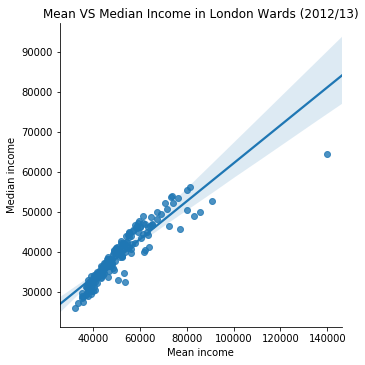

In [60]:
sns.lmplot("Mean 2012/13", "Median 2012/13", data = imported_df[["Mean 2012/13", "Median 2012/13"]], fit_reg=True)
plt.title("Mean VS Median Income in London Wards (2012/13)")
plt.xlabel("Mean income")
plt.ylabel("Median income")
plt.show()

#### It can be seen that, as the mean income increases, the median income increases, yet this rate of increase becomes less steep as the mean income increases. This makes sense, as high mean incomes may be due to a few rich people, yet the median will show what the majority earns. This graph proves that we indeed have to use both variables in the study.

# Part 4- Model Training

#### I will enter my credentials to be able to make calls to the Foursquare API.

In [61]:
CLIENT_ID = 'KZYEBMSUCEHYHBBZTZTVMHKMJPUXTKFH34VTZIUPVJK24HVF'
CLIENT_SECRET = 'E1MZHJTNHQGWPV30SXZWRDKJCJTNK24NJB5YVUFYMC44G2O1'
VERSION = '20180605'

#### This function will automate the process of finding the venues near a ward.

In [62]:
def getNearbyVenues(names, latitudes, longitudes, radius, limit):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
        results = requests.get(url).json()["response"]['groups'][0]['items']
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Ward',
                  'Ward Latitude',
                  'Ward Longitude',
                  'Venue',
                  'Venue Latitude',
                  'Venue Longitude',
                  'Venue Category']
    
    return nearby_venues

#### Looking at the size of London wards, I decided the best value for the radius would be 2500m and the limit should be 400, as this is a large enough sample and most wards will have less venues than this. I stored the venues in London in the DataFrame london_venues.

In [66]:
london_venues = getNearbyVenues(names=imported_df["Ward"], latitudes = imported_df["Latitude"], longitudes = imported_df["Longitude"], radius=500, limit=400)

Abbey Wood
Addiscombe
Alperton
Balham
Barkingside
Barnehurst
Barnes
Barnsbury
Bayswater
Beckton
Becontree
Bellingham
Belmont
Belvedere
Berrylands
Bickley
Biggin Hill
Blackheath
Bloomsbury
Bounds Green
Brentford
Brockley
Brompton
Brunswick Park
Burnt Oak
Cann Hall
Canonbury
Chadwell Heath
Charlton
Cheam
Childs Hill
Chislehurst
Church End
Clerkenwell
Cockfosters
Colindale
Colliers Wood
Colyers
Cranford
Cranham
Crayford
Crofton Park
Crouch End
Crystal Palace
Custom House
Dalston
Dollis Hill
Downham
Earlsfield
East Barnet
East Dulwich
East Finchley
East Sheen
East Wickham
Edgware
Elm Park
Emerson Park
Enfield Highway
Enfield Lock
Erith
Finsbury Park
Forest Hill
Fortis Green
Gipsy Hill
Golders Green
Goodmayes
Gospel Oak
Grove Park
Hackney Central
Haggerston
Hainault
Hampton
Hampton Wick
Hanworth
Harefield
Harlesden
Harold Wood
Harringay
Harrow on the Hill
Harrow Weald
Hatch End
Hendon
Herne Hill
Highgate
Holloway
Hornsey
Hoxton
Ickenham
Isleworth
Kenley
Kensal Green
Kentish Town
Kenton
Kew


In [67]:
london_venues.head()

,Ward,Ward Latitude,Ward Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbey Wood,51.487621,0.114050,Co-op Food,51.487650,0.113490,Grocery Store
1,Abbey Wood,51.487621,0.114050,Bostal Gardens,51.486670,0.110462,Playground
2,Abbey Wood,51.487621,0.114050,Abbey Wood Caravan Club,51.485502,0.120014,Campground
3,Abbey Wood,51.487621,0.114050,Tinas tempting lashes,51.491791,0.111402,Cosmetics Shop
4,Addiscombe,51.379692,-0.074282,The Tram Stop,51.380188,-0.073378,Café


In [68]:
london_venues.shape

(3606, 7)

#### I will look at how many venues are in each ward.

In [69]:
london_venues.groupby("Ward").count()

,Ward Latitude,Ward Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Ward,,,,,,
Abbey Wood,4,4,4,4,4,4
Addiscombe,12,12,12,12,12,12
Alperton,11,11,11,11,11,11
Balham,65,65,65,65,65,65
Barkingside,4,4,4,4,4,4
Barnehurst,5,5,5,5,5,5
Barnes,19,19,19,19,19,19
Barnsbury,22,22,22,22,22,22
Bayswater,100,100,100,100,100,100


#### I will now convert these venues to a DataFrame storing a 1 in the intersection between the neighbourhood and the restaurant type.

In [70]:
london_onehot = pd.get_dummies(london_venues[["Venue Category"]], prefix="", prefix_sep="")
london_onehot["Ward"] = london_venues["Ward"]
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

In [71]:
london_onehot.head()

,Ward,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Video Game Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Windmill,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Abbey Wood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Abbey Wood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abbey Wood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abbey Wood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Addiscombe,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### I will now store these venues as relative frequencies of that venue category in the ward it is found in.

In [72]:
london_grouped = london_onehot.groupby("Ward").mean().reset_index()

In [73]:
london_grouped.head()

,Ward,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Video Game Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Windmill,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Abbey Wood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,Addiscombe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,Alperton,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,Balham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015385
4,Barkingside,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [74]:
london_grouped.shape

(185, 293)

#### As we can see, the relatively small size of London wards means not many venues in each. Let's explore the top 3 venue categories per ward.

In [75]:
num_top_venues = 3

for ward in london_grouped["Ward"]:
    print("----"+ward+"----")
    temp = london_grouped[london_grouped["Ward"] == ward].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abbey Wood----
           venue  freq
0     Playground  0.25
1     Campground  0.25
2  Grocery Store  0.25


----Addiscombe----
                  venue  freq
0                  Park  0.25
1  Fast Food Restaurant  0.17
2         Grocery Store  0.17


----Alperton----
                       venue  freq
0                   Bus Stop  0.09
1       Fast Food Restaurant  0.09
2  Middle Eastern Restaurant  0.09


----Balham----
         venue  freq
0  Coffee Shop  0.15
1  Pizza Place  0.08
2          Pub  0.08


----Barkingside----
           venue  freq
0  Metro Station  0.25
1           Café  0.25
2    Supermarket  0.25


----Barnehurst----
           venue  freq
0    Pizza Place   0.2
1            Pub   0.2
2  Train Station   0.2


----Barnes----
               venue  freq
0  Food & Drink Shop  0.11
1               Park  0.11
2         Restaurant  0.05


----Barnsbury----
           venue  freq
0           Park  0.18
1  Grocery Store  0.18
2            Pub  0.14


----Bayswater----
    

#### Using this data, we will now create clusters of the wards in London, sorting them into buckets of similar types of ward.

In [76]:
london_clustering = pd.merge(imported_df, london_grouped)
london_clustering

,Ward,Latitude,Longitude,Mean 2012/13,Median 2012/13,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Arepa Restaurant,...,Video Game Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Windmill,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Abbey Wood,51.487621,0.114050,39630,31540,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,Addiscombe,51.379692,-0.074282,46520,38070,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,Alperton,51.537768,-0.297924,38550,31250,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,Balham,51.442828,-0.151443,76280,53420,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.015385
4,Barkingside,51.585818,0.088624,49040,39620,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,Barnehurst,51.462687,0.161757,45990,38200,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,Barnes,51.471896,-0.238744,80160,55450,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,Barnsbury,51.538935,-0.114735,62770,44970,0.0,0.045455,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,Bayswater,51.512414,-0.187632,85610,49960,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,Beckton,51.516080,0.059426,40180,34100,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [77]:
london_clustering.drop(["Ward", "Latitude", "Longitude"], axis=1, inplace=True)

#### The mean and median income values are much higher than the rest of the columns, which all have values under 1. I will therefore convert the mean and median columns to a value smaller than 1, where 1 means the income in that ward is the maximum.

In [78]:
mean_max = london_clustering["Mean 2012/13"].max()
median_max = london_clustering["Median 2012/13"].max()
london_clustering["Mean 2012/13"] = london_clustering["Mean 2012/13"]/mean_max
london_clustering["Median 2012/13"] = london_clustering["Median 2012/13"]/median_max

In [79]:
london_clustering.head()

,Mean 2012/13,Median 2012/13,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Video Game Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Windmill,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0.283659,0.490361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.332975,0.591884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.275929,0.485852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.545988,0.830535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015385
4,0.351013,0.615983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


#### The data is now prepared to do the clustering. I will do this using K-Means clustering.

In [149]:
kclusters = 8
kmeans = KMeans(init="k-means++", n_clusters = kclusters, random_state=0).fit(london_clustering)
kmeans.labels_[:15]

array([3, 0, 2, 5, 2, 3, 5, 3, 5, 2, 0, 3, 5, 7, 0], dtype=int32)

In [81]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [82]:
num_top_venues = 8
indicators = ['st', 'nd', 'rd']
columns = ['Ward']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Ward'] = london_grouped['Ward']
for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)
neighborhoods_venues_sorted

,Ward,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Abbey Wood,Playground,Grocery Store,Campground,Cosmetics Shop,Fish Market,Farmers Market,Fast Food Restaurant,Field
1,Addiscombe,Park,Fast Food Restaurant,Café,Grocery Store,Chinese Restaurant,Tram Station,Bakery,Yoga Studio
2,Alperton,Gym / Fitness Center,Hookah Bar,Food & Drink Shop,Supermarket,Fast Food Restaurant,Middle Eastern Restaurant,Hardware Store,Sandwich Place
3,Balham,Coffee Shop,Pub,Pizza Place,Indian Restaurant,Bakery,Café,Steakhouse,English Restaurant
4,Barkingside,Metro Station,Café,Supermarket,Soccer Field,Yoga Studio,Fish Market,Farmers Market,Fast Food Restaurant
5,Barnehurst,Pub,Grocery Store,Train Station,Middle Eastern Restaurant,Pizza Place,Film Studio,Farm,Farmers Market
6,Barnes,Food & Drink Shop,Park,Coffee Shop,Restaurant,Movie Theater,Breakfast Spot,Farmers Market,Bookstore
7,Barnsbury,Grocery Store,Park,Pub,Gastropub,Café,Ethiopian Restaurant,Brewery,Caucasian Restaurant
8,Bayswater,Hotel,Pub,Coffee Shop,Café,Chinese Restaurant,Garden,Greek Restaurant,Pizza Place
9,Beckton,Supermarket,Pub,Light Rail Station,Bus Station,Soccer Field,Furniture / Home Store,Shopping Plaza,Gym / Fitness Center


In [83]:
len(kmeans.labels_)

185

In [134]:
london_merged = pd.merge(imported_df, neighborhoods_venues_sorted)
london_merged

,Ward,Latitude,Longitude,Mean 2012/13,Median 2012/13,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Abbey Wood,51.487621,0.114050,39630,31540,Playground,Grocery Store,Campground,Cosmetics Shop,Fish Market,Farmers Market,Fast Food Restaurant,Field
1,Addiscombe,51.379692,-0.074282,46520,38070,Park,Fast Food Restaurant,Café,Grocery Store,Chinese Restaurant,Tram Station,Bakery,Yoga Studio
2,Alperton,51.537768,-0.297924,38550,31250,Gym / Fitness Center,Hookah Bar,Food & Drink Shop,Supermarket,Fast Food Restaurant,Middle Eastern Restaurant,Hardware Store,Sandwich Place
3,Balham,51.442828,-0.151443,76280,53420,Coffee Shop,Pub,Pizza Place,Indian Restaurant,Bakery,Café,Steakhouse,English Restaurant
4,Barkingside,51.585818,0.088624,49040,39620,Metro Station,Café,Supermarket,Soccer Field,Yoga Studio,Fish Market,Farmers Market,Fast Food Restaurant
5,Barnehurst,51.462687,0.161757,45990,38200,Pub,Grocery Store,Train Station,Middle Eastern Restaurant,Pizza Place,Film Studio,Farm,Farmers Market
6,Barnes,51.471896,-0.238744,80160,55450,Food & Drink Shop,Park,Coffee Shop,Restaurant,Movie Theater,Breakfast Spot,Farmers Market,Bookstore
7,Barnsbury,51.538935,-0.114735,62770,44970,Grocery Store,Park,Pub,Gastropub,Café,Ethiopian Restaurant,Brewery,Caucasian Restaurant
8,Bayswater,51.512414,-0.187632,85610,49960,Hotel,Pub,Coffee Shop,Café,Chinese Restaurant,Garden,Greek Restaurant,Pizza Place
9,Beckton,51.516080,0.059426,40180,34100,Supermarket,Pub,Light Rail Station,Bus Station,Soccer Field,Furniture / Home Store,Shopping Plaza,Gym / Fitness Center


In [150]:
london_merged["Cluster"] = kmeans.labels_

In [151]:
london_merged.head()

,Ward,Latitude,Longitude,Mean 2012/13,Median 2012/13,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,Cluster
0,Abbey Wood,51.487621,0.114050,39630,31540,Playground,Grocery Store,Campground,Cosmetics Shop,Fish Market,Farmers Market,Fast Food Restaurant,Field,3
1,Addiscombe,51.379692,-0.074282,46520,38070,Park,Fast Food Restaurant,Café,Grocery Store,Chinese Restaurant,Tram Station,Bakery,Yoga Studio,0
2,Alperton,51.537768,-0.297924,38550,31250,Gym / Fitness Center,Hookah Bar,Food & Drink Shop,Supermarket,Fast Food Restaurant,Middle Eastern Restaurant,Hardware Store,Sandwich Place,2
3,Balham,51.442828,-0.151443,76280,53420,Coffee Shop,Pub,Pizza Place,Indian Restaurant,Bakery,Café,Steakhouse,English Restaurant,5
4,Barkingside,51.585818,0.088624,49040,39620,Metro Station,Café,Supermarket,Soccer Field,Yoga Studio,Fish Market,Farmers Market,Fast Food Restaurant,2


#### Now that we have out final df ready for plotting, let's examine the clusters to make sure they make sense.

In [152]:
london_merged.loc[london_merged["Cluster"] == 0]

,Ward,Latitude,Longitude,Mean 2012/13,Median 2012/13,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,Cluster
1,Addiscombe,51.379692,-0.074282,46520,38070,Park,Fast Food Restaurant,Café,Grocery Store,Chinese Restaurant,Tram Station,Bakery,Yoga Studio,0
10,Becontree,51.549265,0.127538,37860,33000,Construction & Landscaping,Park,Plaza,Flea Market,Farmers Market,Fast Food Restaurant,Field,Film Studio,0
14,Berrylands,51.393781,-0.284802,54530,42330,Gym / Fitness Center,Bus Stop,Park,Fish Market,Farmers Market,Fast Food Restaurant,Field,Film Studio,0
23,Brunswick Park,51.626219,-0.148190,46940,36310,Bus Stop,Café,Park,Yoga Studio,Flea Market,Fast Food Restaurant,Field,Film Studio,0
46,Downham,51.426111,0.006457,37320,30880,Park,Gym / Fitness Center,Café,Grocery Store,Fish & Chips Shop,Farmers Market,Fast Food Restaurant,Field,0
71,Hanworth,51.434848,-0.390361,39140,31150,Grocery Store,Fast Food Restaurant,Restaurant,Park,Yoga Studio,Fish & Chips Shop,Farm,Farmers Market,0
95,Lea Bridge,51.562144,-0.045827,37560,31450,Nature Preserve,Park,Pub,Grocery Store,Skating Rink,Fish & Chips Shop,Farmers Market,Fast Food Restaurant,0
96,Leyton,51.569673,-0.015681,37090,31040,Hotel,Grocery Store,Farm,Restaurant,Park,Yoga Studio,Fish & Chips Shop,Farmers Market,0
107,Mill Hill,51.615442,-0.233068,56660,41920,Pharmacy,Park,Athletics & Sports,Yoga Studio,Fish & Chips Shop,Farmers Market,Fast Food Restaurant,Field,0
117,Northwood,51.605171,-0.420581,57970,46550,Park,Gym / Fitness Center,Golf Course,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,0


In [153]:
london_merged.loc[london_merged["Cluster"] == 1]

,Ward,Latitude,Longitude,Mean 2012/13,Median 2012/13,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,Cluster
44,Dalston,51.543402,-0.067229,46500,38230,Pub,Wine Shop,Café,Restaurant,Convenience Store,Pool,Gastropub,Creperie,1
55,Enfield Highway,51.657021,-0.047100,36850,29450,Pub,Sports Club,Grocery Store,Fast Food Restaurant,Yoga Studio,Fish Market,Farmers Market,Field,1
74,Harold Wood,51.592823,0.232839,44860,37010,Pub,Café,Grocery Store,Automotive Shop,Yoga Studio,Fish Market,Farmers Market,Fast Food Restaurant,1
83,Hornsey,51.587364,-0.120967,52520,40260,Pub,Supermarket,Pizza Place,Bakery,Park,Farmers Market,Thai Restaurant,Mediterranean Restaurant,1
86,Isleworth,51.468356,-0.326311,43770,34790,Pub,Italian Restaurant,Asian Restaurant,Bus Stop,Breakfast Spot,Chinese Restaurant,Fast Food Restaurant,Grocery Store,1
88,Kensal Green,51.530606,-0.224445,42750,34640,Pub,Brazilian Restaurant,Bakery,Park,Train Station,Grocery Store,Restaurant,Indian Restaurant,1
94,Ladywell,51.456026,-0.019192,48990,40290,Pub,Coffee Shop,Café,Park,Grocery Store,Gym / Fitness Center,Bakery,Doner Restaurant,1
97,Leytonstone,51.571078,0.006424,46400,38700,Pub,Café,Grocery Store,Metro Station,Mediterranean Restaurant,Clothing Store,Bakery,Fast Food Restaurant,1
102,Lower Morden,51.389774,-0.216364,52260,38730,Pub,Garden Center,Yoga Studio,Fish Market,Farm,Farmers Market,Fast Food Restaurant,Field,1
118,Norwood Green,51.496606,-0.369377,36730,29020,Pub,Café,Playground,Yoga Studio,Flea Market,Farmers Market,Fast Food Restaurant,Field,1


In [154]:
london_merged.loc[london_merged["Cluster"] == 2]

,Ward,Latitude,Longitude,Mean 2012/13,Median 2012/13,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,Cluster
2,Alperton,51.537768,-0.297924,38550,31250,Gym / Fitness Center,Hookah Bar,Food & Drink Shop,Supermarket,Fast Food Restaurant,Middle Eastern Restaurant,Hardware Store,Sandwich Place,2
4,Barkingside,51.585818,0.088624,49040,39620,Metro Station,Café,Supermarket,Soccer Field,Yoga Studio,Fish Market,Farmers Market,Fast Food Restaurant,2
9,Beckton,51.516080,0.059426,40180,34100,Supermarket,Pub,Light Rail Station,Bus Station,Soccer Field,Furniture / Home Store,Shopping Plaza,Gym / Fitness Center,2
19,Bounds Green,51.607376,-0.124905,44700,34550,Pub,Coffee Shop,Breakfast Spot,Gourmet Shop,Grocery Store,Tennis Court,Beer Bar,Café,2
20,Brentford,51.486396,-0.321662,44100,35040,Coffee Shop,Gym,Deli / Bodega,Convenience Store,Bus Stop,English Restaurant,Sandwich Place,Pizza Place,2
26,Chadwell Heath,51.570047,0.129784,38860,33920,Supermarket,Gym,Pub,Park,Breakfast Spot,Platform,Grocery Store,Train Station,2
34,Colindale,51.591519,-0.256773,39990,30170,Supermarket,Fast Food Restaurant,Pub,Clothing Store,Food Court,Gym / Fitness Center,Chinese Restaurant,Malay Restaurant,2
35,Colliers Wood,51.418275,-0.177863,52340,38780,Italian Restaurant,Hotel,Clothing Store,Coffee Shop,Electronics Store,Bus Stop,Department Store,Furniture / Home Store,2
37,Cranford,51.480671,-0.409677,38790,30860,Bus Stop,Hotel,Restaurant,Portuguese Restaurant,Pizza Place,Business Service,Fried Chicken Joint,Fruit & Vegetable Store,2
39,Crayford,51.451558,0.178719,41810,34900,Supermarket,Bus Stop,Sporting Goods Shop,Coffee Shop,Track Stadium,Café,Train Station,Clothing Store,2


In [155]:
london_merged.loc[london_merged["Cluster"] == 3]

,Ward,Latitude,Longitude,Mean 2012/13,Median 2012/13,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,Cluster
0,Abbey Wood,51.487621,0.114050,39630,31540,Playground,Grocery Store,Campground,Cosmetics Shop,Fish Market,Farmers Market,Fast Food Restaurant,Field,3
5,Barnehurst,51.462687,0.161757,45990,38200,Pub,Grocery Store,Train Station,Middle Eastern Restaurant,Pizza Place,Film Studio,Farm,Farmers Market,3
7,Barnsbury,51.538935,-0.114735,62770,44970,Grocery Store,Park,Pub,Gastropub,Café,Ethiopian Restaurant,Brewery,Caucasian Restaurant,3
11,Bellingham,51.431081,-0.024515,37860,31340,Grocery Store,Gym,Event Service,Train Station,Park,Yoga Studio,Falafel Restaurant,Farmers Market,3
16,Biggin Hill,51.316629,0.032717,52070,40930,Airport Terminal,Pub,Music Venue,Grocery Store,Convenience Store,Café,Food Stand,Food Truck,3
21,Brockley,51.457833,-0.036087,46130,38100,Grocery Store,Café,Coffee Shop,Convenience Store,Diner,Train Station,Flower Shop,Brewery,3
27,Charlton,51.482605,0.036536,47740,37940,Grocery Store,Pub,Construction & Landscaping,Food Truck,Soccer Stadium,Park,Thai Restaurant,Coffee Shop,3
29,Childs Hill,51.562982,-0.197249,52190,38960,Bus Stop,Food Truck,Health & Beauty Service,Grocery Store,Coffee Shop,Fish & Chips Shop,Farmers Market,Fast Food Restaurant,3
36,Colyers,51.471431,0.164446,41250,34450,Grocery Store,Chinese Restaurant,Electronics Store,Fish Market,Farmers Market,Fast Food Restaurant,Field,Film Studio,3
38,Cranham,51.561488,0.267910,51810,42250,Grocery Store,Cupcake Shop,Fast Food Restaurant,Indian Restaurant,Park,Home Service,Fish & Chips Shop,Farm,3


In [156]:
london_merged.loc[london_merged["Cluster"] == 4]

,Ward,Latitude,Longitude,Mean 2012/13,Median 2012/13,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,Cluster
115,North End,-33.01277,27.90062,56020,39510,Department Store,Restaurant,Yoga Studio,Fish Market,Farm,Farmers Market,Fast Food Restaurant,Field,4


In [157]:
london_merged.loc[london_merged["Cluster"] == 5]

,Ward,Latitude,Longitude,Mean 2012/13,Median 2012/13,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,Cluster
3,Balham,51.442828,-0.151443,76280,53420,Coffee Shop,Pub,Pizza Place,Indian Restaurant,Bakery,Café,Steakhouse,English Restaurant,5
6,Barnes,51.471896,-0.238744,80160,55450,Food & Drink Shop,Park,Coffee Shop,Restaurant,Movie Theater,Breakfast Spot,Farmers Market,Bookstore,5
8,Bayswater,51.512414,-0.187632,85610,49960,Hotel,Pub,Coffee Shop,Café,Chinese Restaurant,Garden,Greek Restaurant,Pizza Place,5
12,Belmont,51.343785,-0.201152,55230,44260,Pub,Asian Restaurant,Park,Train Station,Electronics Store,Bus Stop,Discount Store,Dive Bar,5
15,Bickley,51.401740,0.043712,61330,47190,Bus Stop,Cricket Ground,Train Station,Home Service,Yoga Studio,Fish Market,Farmers Market,Fast Food Restaurant,5
17,Blackheath,51.466318,0.008562,55200,44870,Pub,Café,Bakery,Restaurant,French Restaurant,Indian Restaurant,Pizza Place,Library,5
18,Bloomsbury,51.523126,-0.126066,62190,40340,Coffee Shop,Café,Hotel,Exhibit,Pub,Bookstore,Park,Garden,5
22,Brompton,51.491822,-0.178326,139710,64320,Hotel,Bakery,Burger Joint,Café,Pizza Place,Ice Cream Shop,Tapas Restaurant,Sandwich Place,5
25,Canonbury,51.548524,-0.092983,56130,40590,Pub,Café,Indian Restaurant,Train Station,Fruit & Vegetable Store,Modern European Restaurant,Organic Grocery,Sushi Restaurant,5
28,Cheam,51.357616,-0.216241,58070,46220,Grocery Store,Italian Restaurant,Pub,Coffee Shop,Bookstore,Gastropub,Salon / Barbershop,Thai Restaurant,5


In [158]:
london_merged.loc[london_merged["Cluster"] == 6]

,Ward,Latitude,Longitude,Mean 2012/13,Median 2012/13,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,Cluster
99,Little Ilford,51.550298,0.062523,35280,29730,Park,Yoga Studio,Fried Chicken Joint,Farm,Farmers Market,Fast Food Restaurant,Field,Film Studio,6
103,Loxford,51.548194,0.084051,35150,28500,Park,Furniture / Home Store,Pool,Yoga Studio,Fish Market,Farmers Market,Fast Food Restaurant,Field,6


In [159]:
london_merged.loc[london_merged["Cluster"] == 7]

,Ward,Latitude,Longitude,Mean 2012/13,Median 2012/13,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,Cluster
13,Belvedere,51.489473,0.147359,40110,33510,Grocery Store,Train Station,Indian Restaurant,Eastern European Restaurant,Yoga Studio,Fish & Chips Shop,Farmers Market,Fast Food Restaurant,7
24,Burnt Oak,51.604988,-0.264450,39000,29400,Bakery,Indian Restaurant,Grocery Store,Coffee Shop,Metro Station,Wings Joint,Food Court,Food & Drink Shop,7
68,Hainault,51.603316,0.093360,38700,31520,Bus Stop,Burger Joint,Indian Restaurant,Metro Station,Fish Market,Farm,Farmers Market,Fast Food Restaurant,7
77,Harrow Weald,51.604786,-0.340485,46390,36940,Indian Restaurant,Grocery Store,Thai Restaurant,Supermarket,Yoga Studio,Fish Market,Farmers Market,Fast Food Restaurant,7
105,Manor Park,51.552552,0.046467,37310,31580,Indian Restaurant,Pub,Train Station,Fast Food Restaurant,Restaurant,Gym / Fitness Center,Flower Shop,Food,7
132,Queensbury,51.594190,-0.286181,43850,35030,Indian Restaurant,Bus Stop,Breakfast Spot,Supermarket,Flower Shop,Fast Food Restaurant,Field,Film Studio,7
133,Rayners Lane,51.576714,-0.370300,51060,40310,Indian Restaurant,Grocery Store,Pizza Place,Coffee Shop,Sandwich Place,Pub,Vegetarian / Vegan Restaurant,Metro Station,7
171,West Drayton,51.503513,-0.466270,39500,32680,Construction & Landscaping,Indian Restaurant,Grocery Store,Bed & Breakfast,Food Court,Food & Drink Shop,Food,Food Stand,7
175,West Harrow,51.579585,-0.353069,50910,40210,Metro Station,Grocery Store,Indian Restaurant,Warehouse Store,Park,Fish & Chips Shop,Farm,Farmers Market,7


#### I will now visualise the clusters on a Folium map.

In [161]:
map_clusters = folium.Map(location = london_coordinates, zoom_start=10)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [162]:
for lat, lon, neigh, cluster in zip(london_merged["Latitude"], london_merged["Longitude"], london_merged["Ward"], london_merged["Cluster"]):
    label = folium.Popup(str(neigh) + " Cluster " + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [163]:
map_clusters